# Can AI recognize artistic 'Creativity'?

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/purplevjs/XAI_W7)


*This hypothesis aims to test whether AI perceives artworks as simple patterns or learns in new ways from more creative works.*   
&nbsp;
&nbsp;
- **H0**: Deep learning models learn patterns in abstract painting at the same level, regardless of the degree of creativity (e.g., complexity, symmetry, color diversity).  

- **H1**: Deep learning models learn better from artworks with higher creativity (e.g., complex patterns, unique color combinations).


#### Data Explanation
- **Complex abstract paintings**: With intricate patterns, diverse colors, and asymmetry, these creative images require the model to learn more details, making them harder to process than simpler images.  
Link: https://www.kaggle.com/datasets/robgonsalves/abstract-paintings

&nbsp;
- **Simple images (Chair dataset)**: Chair images have clear, simple shapes, focusing on typical structures rather than creativity, making them easier for the model to learn.  
Link: https://www.kaggle.com/datasets/jefersondaniel/simple-image-detection-3-classes

In [8]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale=1./255)


# Loading data
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/xai_dataset/train',
    target_size=(150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/xai_dataset/test',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 214 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


### Model: CNN (Convolutional Neural Network)

CNN is a type of deep learning model mainly used for working with images or videos. In basic terms, CNNs learn patterns from images on their own and use that knowledge to do tasks like classifying images, recognizing objects, or even generating new images.

In [25]:
# Create CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    # rotate 10 times
    epochs=10,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size

)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 74s 8s/step - accuracy: 0.5398 - loss: 1.3096 - val_accuracy: 0.5208 - val_loss: 0.6398
Epoch 2/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5000 - loss: 0.6703

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5000 - loss: 0.6703 - val_accuracy: 0.5714 - val_loss: 0.6053
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.6338 - loss: 0.5788 - val_accuracy: 0.8854 - val_loss: 0.3292
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8125 - loss: 0.4779 - val_accuracy: 0.7857 - val_loss: 0.7066
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.7569 - loss: 0.6051 - val_accuracy: 0.8750 - val_loss: 0.3330
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6875 - loss: 0.5956 - val_accuracy: 0.9286 - val_loss: 0.3399
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.8356 - loss: 0.4340 - val_accuracy: 0.8854 - val_loss: 0.3964
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8125 - loss: 0.3582 - val_accuracy: 0.9286 - val_loss: 0.2298
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.8177 - loss: 0.4128 - val_accuracy: 0.8646 - val_loss: 0.3558
Epoch 10/10
6/6 ━

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8699 - loss: 0.3875
Accuracy: 87.27%


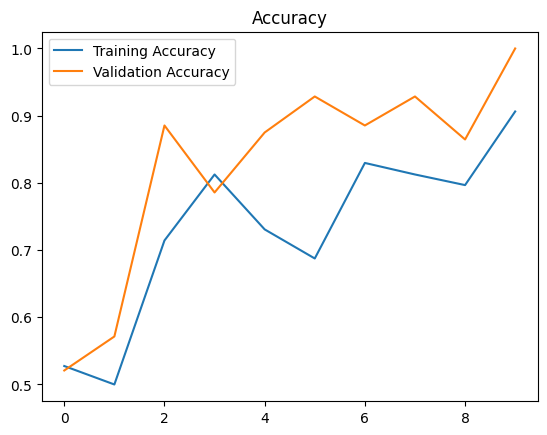

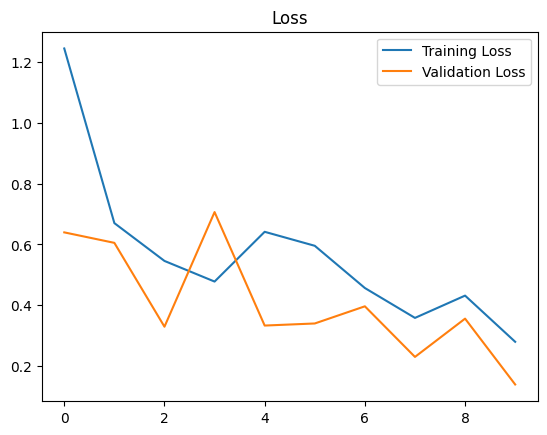

In [27]:
# Evaluate the model

loss, accuracy = model.evaluate(validation_generator)
print(f'Accuracy: {accuracy *100:.2f}%')


# Visualizaion
# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

- As the training continues over the epochs, both the training and validation accuracy are improving. This suggests that the model is getting better at differentiating between abstract and simple images.
- The validation accuracy is consistently higher than the training accuracy and is getting close to 1. This could mean that the model isn’t overfitting and is doing a good job at generalizing. In other words, the model seems to be classifying new data (the validation set) quite well.

The model appears to support the ***H1 hypothesis: "Deep learning models learn more effectively from artworks that display greater creativity, such as complex patterns and unique color combinations."*** With high accuracy in both training and validation, it suggests that the model might be better at identifying images with more creative elements.